In [1]:
%load_ext autoreload
%autoreload 2

import os, sys
sys.path.insert(0, '..')

import pandas as pd
import numpy as np
import src.utils as utils
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker

In [2]:
denta_data_path = os.path.join('..', 'data', 'experiments', 'denta')
tnf_data_path = os.path.join('..', 'data', 'experiments', 'tnf')
charts_save_path = os.path.join('..', 'data', 'experiments', 'charts')
tables_save_path = os.path.join('..', 'data', 'experiments', 'tables')

In [3]:
denta_agg_5fold_0_32 = utils.load_pickle(os.path.join(denta_data_path, 'aggregation_5fold_0_32.pkl'))
denta_agg_5fold_64_68 = utils.load_pickle(os.path.join(denta_data_path, 'aggregation_5fold_64_68.pkl'))
# denta_agg_loo = utils.load_pickle(os.path.join(denta_data_path, 'aggregation_loo.pkl'))
# denta_selection_rfe_geom_0_32 = utils.load_pickle(os.path.join(denta_data_path, 'features_selection_rfe_geom_0_32.pkl'))
# denta_selection_rfe_geom_64_68 = utils.load_pickle(os.path.join(denta_data_path, 'features_selection_rfe_geom_64_68.pkl'))
# denta_selection_sequential_geom_0_32 = utils.load_pickle(os.path.join(denta_data_path, 'features_selection_sfs_geom_0_32.pkl'))
# denta_selection_sequential_geom_64_68 = utils.load_pickle(os.path.join(denta_data_path, 'features_selection_sfs_geom_64_68.pkl'))
# denta_selection_anova_geom_0_32 = utils.load_pickle(os.path.join(denta_data_path, 'features_selection_anova_geom_0_32.pkl'))
# denta_selection_anova_geom_64_68 = utils.load_pickle(os.path.join(denta_data_path, 'features_selection_anova_geom_64_68.pkl'))
# denta_selection_top_geom = utils.load_pickle(os.path.join(denta_data_path, 'features_selection_top_geom_0_32.pkl'))
# denta_pca_5fold = utils.load_pickle(os.path.join(denta_data_path, 'pca_5fold.pkl'))
# denta_pca_loo = utils.load_pickle(os.path.join(denta_data_path, 'pca_loo.pkl'))
# denta_selection_rfe_hog = utils.load_pickle(os.path.join(denta_data_path, 'hog', 'features_selection_rfe_hog.pkl'))
# denta_selection_anova_hog = utils.load_pickle(os.path.join(denta_data_path, 'hog', 'features_selection_anova_hog.pkl'))
# denta_selection_top_hog = utils.load_pickle(os.path.join(denta_data_path, 'hog', 'features_selection_top_hog.pkl'))

dummy_denta_agg_5fold = utils.load_pickle(os.path.join(denta_data_path, 'dummy_aggregation_5fold.pkl'))

# Generate charts for different reference points

In [5]:
def agg(x):
    d = {}
    d['f1_mean'] = x['f1'].mean()
    d['f1_std'] = x['f1'].std()

    return pd.Series(d, index=['f1_mean', 'f1_std'])

LEGEND_MAPPER = {
    'Paralysis': 'Paraliż',
    'Custom': 'Połączone',
    'Karolewski': 'Własne',
    'HOG': 'HOG',
    'KarolewskiFiltered': 'Static',
    'KarolewskiFiltered+Dynamic': 'Static+Dynamic',
    'Dynamic': 'Dynam'
}

denta_agg_df = pd.DataFrame(denta_agg_5fold_0_32 + denta_agg_5fold_64_68)
denta_agg_df = denta_agg_df[denta_agg_df['features'].isin([
    'KarolewskiFiltered',
    'KarolewskiFiltered+Dynamic'
])]
denta_agg_df['features'] = denta_agg_df['features'].map(LEGEND_MAPPER)

# denta_agg_df['f1'] = denta_agg_df.apply(lambda row: f1_score(row['true'], row['predictions'], average='macro'), axis=1)
denta_agg_df['f1'] = denta_agg_df.apply(lambda row: np.mean(row['f1']), axis=1)
denta_agg_grouped_df = denta_agg_df.groupby(
    by=['estimator', 'features', 'aggregation', 'ref_points']).apply(agg).reset_index()

dummy_denta_agg_df = pd.DataFrame(dummy_denta_agg_5fold)
# denta_agg_df['f1'] = denta_agg_df.apply(lambda row: f1_score(row['true'], row['predictions'], average='macro'), axis=1)
# dummy_denta_agg_df['f1'] = dummy_denta_agg_df.apply(lambda row: np.mean(row['f1']), axis=1)
dummy_denta_agg_df = dummy_denta_agg_df[dummy_denta_agg_df['features'] == 'Dynamic']
dummy_denta_agg_df = dummy_denta_agg_df.groupby(
    by=['estimator']).apply(agg).reset_index()

In [12]:
from src.analysis import barplot_classifiers

In [13]:
denta_agg_df.loc[denta_agg_df['estimator'] == 'SVM', 'estimator'] = 'SVC'

d:\Users\micha\Documents\Side projects\orofacial-disorders\experiments-notebooks\..\src\analysis.py:85: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(data=df,


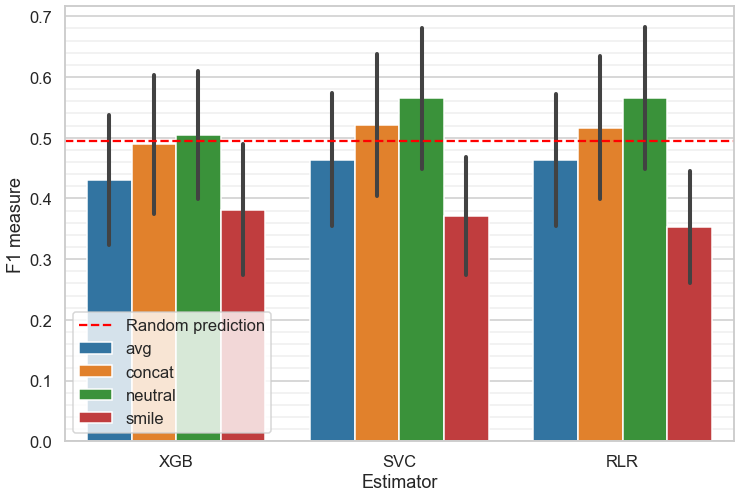

In [14]:
barplot_classifiers(
    denta_agg_df[denta_agg_df['features'] == 'Static'],
    filtered_col="ref_points",
    filtered_value="0_32",
    hue="aggregation",
    save_path=charts_save_path,
    dummy_df=dummy_denta_agg_df,
    dummy_label='Random prediction'
)

d:\Users\micha\Documents\Side projects\orofacial-disorders\experiments-notebooks\..\src\analysis.py:85: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(data=df,


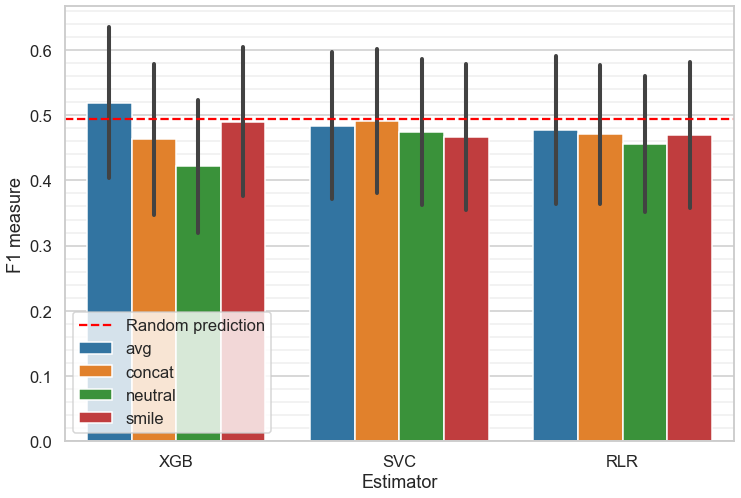

In [15]:
barplot_classifiers(
    denta_agg_df[denta_agg_df['features'] == 'Static'],
    filtered_col="ref_points",
    filtered_value="64_68",
    hue="aggregation",
    save_path=charts_save_path,
    dummy_df=dummy_denta_agg_df,
    dummy_label='Random prediction'
)

# Generate tables for different reference points

In [16]:
from src.analysis import convert_to_latex_table


In [17]:
df = denta_agg_grouped_df[
    (denta_agg_grouped_df['ref_points'] == '0_32') &
    (denta_agg_grouped_df['features'] == 'Static')
]
convert_to_latex_table(
    df,
    row_names=['RLR', 'SVC', 'XGB'],
    sort_by=['estimator', 'aggregation'],
    label='estimators_0_32',
    save_path=tables_save_path,
    index_names=['', 'Estimators'],
    index_product_lists=[['Avg', 'Concat', 'Netural', 'Smile'], ['$\mu$', '$\sigma$']]
)

In [18]:
df = denta_agg_grouped_df[
    (denta_agg_grouped_df['ref_points'] == '64_68') &
    (denta_agg_grouped_df['features'] == 'Static')
]
convert_to_latex_table(
    df,
    row_names=['RLR', 'SVC', 'XGB'],
    sort_by=['estimator', 'aggregation'],
    label='estimators_64_68',
    save_path=tables_save_path,
    index_names=['', 'Estimators'],
    index_product_lists=[['Avg', 'Concat', 'Netural', 'Smile'], ['$\mu$', '$\sigma$']]
)

## Generate table with dynamic, dynamic+chosen and only chosen features

In [24]:
df = denta_agg_df[
    (denta_agg_df['estimator'] == 'RLR') &
    (denta_agg_df['aggregation'] == 'neutral') &
    (denta_agg_df['ref_points'] == '0_32')
]
df['features'].value_counts()

Static+Dynamic    200
Static            200
Name: features, dtype: int64

In [25]:
dynamic_df = pd.read_csv(os.path.join(denta_data_path, "ex4_res.csv"))
dynamic_df["features"] = "Dynamic"
dynamic_df = dynamic_df[dynamic_df["model"] == "RLR"]
dynamic_df = dynamic_df.rename(columns={"f1_macro": "f1"})
dynamic_df = dynamic_df[['features', 'f1']]

In [27]:
df = pd.concat([dynamic_df, df])

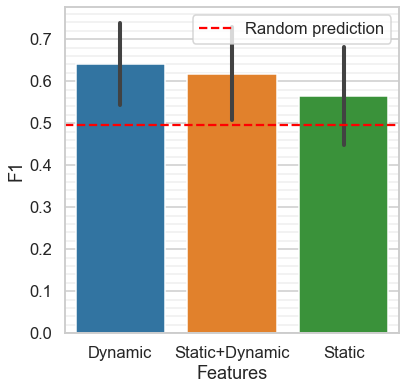

In [28]:
from src.analysis import add_baseline, control_savefig

f, ax = plt.subplots(1, 1, figsize=(6, 6))
ax = sns.barplot(
    data=df, x="features", y="f1", ax=ax, errorbar="sd"
)
ax.get_yaxis().set_minor_locator(ticker.AutoMinorLocator())
ax.grid(visible=True, which='minor', color='grey', linewidth=0.2)
ax.set_xlabel('Features')
ax.set_ylabel('F1')
add_baseline(ax, dummy_denta_agg_df, label='Random prediction')
control_savefig('combined_features.png', charts_save_path)

In [23]:
df = denta_agg_grouped_df[
    (denta_agg_grouped_df['estimator'] == 'RLR') &
    (denta_agg_grouped_df['aggregation'] == 'neutral') &
    (denta_agg_grouped_df['ref_points'] == '0_32')
]
convert_to_latex_table(
    df,
    row_names=[''],
    sort_by=['estimator', 'aggregation'],
    label='combined_features',
    save_path=tables_save_path,
    index_names=['Features', 'Value'],
    index_product_lists=[['Static', 'Static+Dynamic'], ['$\mu$', '$\sigma$']],
    highlight_max=False
)